In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult_df = pd.read_csv(r"C:\Users\Dell\Downloads\adult_data.csv",header=None)
adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult_df.columns = ["age","workclass","fnlwgt","education","education-num",
        "marital-status","occupation","relationship","race","sex",
        "capital-gain","capital-loss","hours-per-week","native-country","income"]

adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.info()

# int64(6), object(9)- The system doesnot recognize categorical data, so we need to handle it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
adult_df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Data Pre-Processing

In [7]:
adult_df_copy = adult_df.copy()
print(adult_df_copy.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [8]:
adult_df_copy.duplicated().sum()

24

In [9]:
adult_df_copy.drop_duplicates(inplace=True, keep="first")
adult_df_copy.shape

(32537, 15)

In [10]:
adult_df_copy.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
adult_df_copy.drop(['fnlwgt', 'education'], axis=1, inplace=True)

adult_df_copy

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
for i in adult_df_copy:
    print(adult_df_copy[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[ 2174     0 14084  5178  5013  2407 14344 

In [13]:
adult_df_copy.replace(' ?', np.nan, inplace=True)

In [14]:
adult_df_copy.isnull().sum()

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [15]:
# Mode of selected categorical columns
print("workclass:", adult_df_copy['workclass'].mode()[0])
print("occupation:", adult_df_copy['occupation'].mode()[0])
print("native-country:", adult_df_copy['native-country'].mode()[0])

workclass:  Private
occupation:  Prof-specialty
native-country:  United-States


In [16]:
adult_df_copy['workclass'].replace(np.nan, adult_df_copy['workclass'].mode()[0], inplace=True)
adult_df_copy['occupation'].replace(np.nan, adult_df_copy['occupation'].mode()[0], inplace=True)
adult_df_copy['native-country'].replace(np.nan, adult_df_copy['native-country'].mode()[0], inplace=True)

print(adult_df_copy[['workclass','occupation','native-country']])

               workclass          occupation  native-country
0              State-gov        Adm-clerical   United-States
1       Self-emp-not-inc     Exec-managerial   United-States
2                Private   Handlers-cleaners   United-States
3                Private   Handlers-cleaners   United-States
4                Private      Prof-specialty            Cuba
...                  ...                 ...             ...
32556            Private        Tech-support   United-States
32557            Private   Machine-op-inspct   United-States
32558            Private        Adm-clerical   United-States
32559            Private        Adm-clerical   United-States
32560       Self-emp-inc     Exec-managerial   United-States

[32537 rows x 3 columns]


for value in ["workclass", "occupation", "native_country"]:

    adult_df_copy[value].fillna(
    adult_df_copy[value].mode()[0], 
    inplace=True)
replacing the value using for loop

In [17]:
adult_df_copy.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [18]:
adult_df_copy.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

# Data Encoding

In [19]:
adult_df_copy_new = pd.get_dummies(adult_df_copy, dtype = int)

# adult_df_copy_new = pd.get_dummies(adult_df_copy)    # If we run this the output will be in the form of True and False

adult_df_copy_new.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
adult_df_copy_new.shape

(32537, 90)

In [21]:
adult_df_copy_new.dtypes

age                              int64
education-num                    int64
capital-gain                     int64
capital-loss                     int64
hours-per-week                   int64
                                 ...  
native-country_ United-States    int32
native-country_ Vietnam          int32
native-country_ Yugoslavia       int32
income_ <=50K                    int32
income_ >50K                     int32
Length: 90, dtype: object

In [22]:
colname = []

for x in adult_df_copy.columns:
    if adult_df_copy[x].dtype == 'object':
        colname.append(x)

colname

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    adult_df_copy[x] = le.fit_transform(adult_df_copy[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------')

Feature workclass
mapping {' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}
-----------------
Feature marital-status
mapping {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
-----------------
Feature occupation
mapping {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
-----------------
Feature relationship
mapping {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
-----------------
Feature race
mapping {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, '

In [24]:
adult_df_copy.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [25]:
data = {'Gender': ['Female', 'Male', 'Female']}

df = pd.DataFrame(data)

df.head()

,Gender
0,Female
1,Male
2,Female


In [26]:
le_gender = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])

df.head()

,Gender
0,0
1,1
2,0


In [27]:
df["Gender"] = le_gender.inverse_transform(df["Gender"])

df.head()

,Gender
0,Female
1,Male
2,Female


In [28]:
tips = sns.load_dataset('tips')

tips["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [29]:
tips["smoker"] = tips["smoker"].map({'Yes': 1, 'No': 0})

In [30]:
tips["smoker"].value_counts()

# As we can see in the output that we have assigned 0 for "No"(151) and 1 for "Yes" (93)

smoker
0    151
1     93
Name: count, dtype: int64

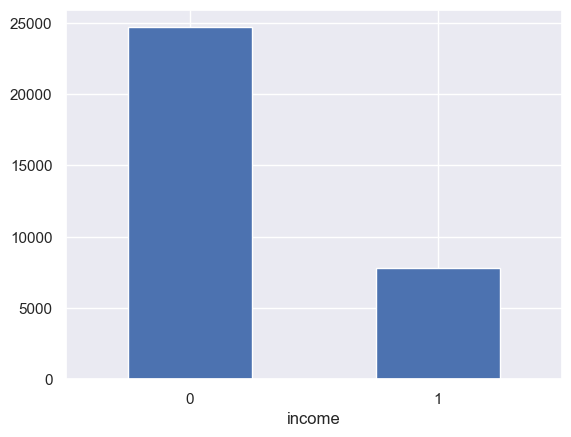

In [31]:
sns.set()

income_plot = adult_df_copy['income'].value_counts().plot(kind='bar')

plt.xlabel = ("Income")
plt.ylabel = ("Count")
plt.xticks(rotation = 360)


plt.show()

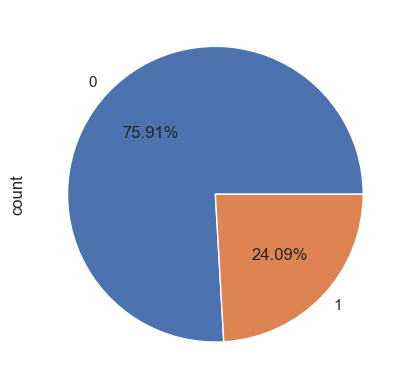

In [32]:
income_plot = adult_df_copy['income'].value_counts().plot(kind='pie', autopct = "%.2f%%")
plt.show()

In [33]:
X = adult_df_copy.values[:, 0:-1]

Y = adult_df_copy.values[:, -1]

print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [35]:
print(X)

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


In [36]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,        
    random_state=0       
)

In [86]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22775, 12)
(22775,)
(9762, 12)
(9762,)


In [87]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(Y_pred)

[0 0 1 ... 0 0 0]


In [88]:
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob

array([[0.71333914, 0.28666086],
       [0.92342099, 0.07657901],
       [0.45166947, 0.54833053],
       ...,
       [0.97701344, 0.02298656],
       [0.85360942, 0.14639058],
       [0.94346106, 0.05653894]])

In [41]:
print(list(zip(Y_test, Y_pred)))

[(1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0),

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report")
print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

[[6940  405]
 [1302 1115]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7345
           1       0.73      0.46      0.57      2417

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8251382913337431


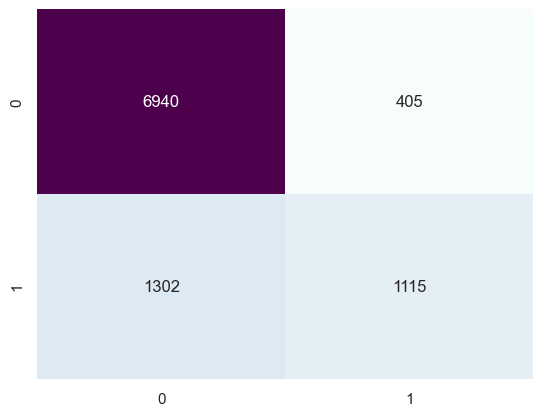

Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7345
           1       0.73      0.46      0.57      2417

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [43]:
cfm = confusion_matrix(Y_test, Y_pred)

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')


plt.show()

print("Classification report")
print(classification_report(Y_test, Y_pred))

In [44]:
y_pred_prob = classifier.predict_proba(X_test)

print(y_pred_prob)

[[0.71333914 0.28666086]
 [0.92342099 0.07657901]
 [0.45166947 0.54833053]
 ...
 [0.97701344 0.02298656]
 [0.85360942 0.14639058]
 [0.94346106 0.05653894]]


In [45]:
y_pred_class = []

for value in y_pred_prob[:, 1]:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 
print(y_pred_class)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, y_pred_class)
print(cfm)

print("Classification report")
print(classification_report(Y_test, y_pred_class))

acc = accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ", acc)

[[6940  405]
 [1302 1115]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7345
           1       0.73      0.46      0.57      2417

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8251382913337431


In [47]:
for a in np.arange(0.4, 0.61, 0.01):
    
    predict_mine = np.where(y_pred_prob[:, 1] > a, 1, 0)
    
    cfm = confusion_matrix(Y_test, predict_mine)
    
    total_err = cfm[0, 1] + cfm[1, 0]
    
    print("Errors at threshold", a, 
         ":", total_err,
         ", type 2 error:", cfm[1, 0],
         ", type 1 error:", cfm[0, 1])

Errors at threshold 0.4 : 1732 , type 2 error: 1035 , type 1 error: 697
Errors at threshold 0.41000000000000003 : 1724 , type 2 error: 1062 , type 1 error: 662
Errors at threshold 0.42000000000000004 : 1726 , type 2 error: 1088 , type 1 error: 638
Errors at threshold 0.43000000000000005 : 1720 , type 2 error: 1106 , type 1 error: 614
Errors at threshold 0.44000000000000006 : 1718 , type 2 error: 1133 , type 1 error: 585
Errors at threshold 0.45000000000000007 : 1721 , type 2 error: 1166 , type 1 error: 555
Errors at threshold 0.4600000000000001 : 1715 , type 2 error: 1194 , type 1 error: 521
Errors at threshold 0.4700000000000001 : 1716 , type 2 error: 1228 , type 1 error: 488
Errors at threshold 0.4800000000000001 : 1710 , type 2 error: 1256 , type 1 error: 454
Errors at threshold 0.4900000000000001 : 1708 , type 2 error: 1280 , type 1 error: 428
Errors at threshold 0.5000000000000001 : 1707 , type 2 error: 1302 , type 1 error: 405
Errors at threshold 0.5100000000000001 : 1702 , type 

In [48]:
# As the threshold increasing the False positive error(Type 1) decreasing and 
# As the threshold increasing False negative error(Type 2) increasing

In [49]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:, 1])

auc = metrics.auc(fpr, tpr)

print(auc)

0.8541565544490988


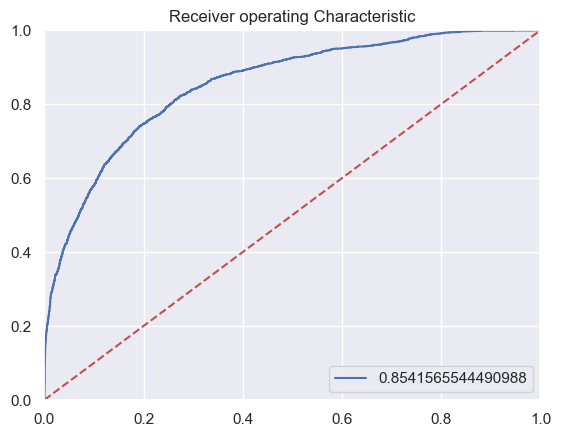

In [50]:
import matplotlib.pyplot as plt

plt.title('Receiver operating Characteristic')

plt.plot(fpr, tpr, 'b', label=auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

plt.show()

In [51]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)

auc = metrics.auc(fpr, tpr)

print(auc)
# Plot the graph for this

print(fpr)
print(tpr)

0.703088064940504
[0.         0.05513955 1.        ]
[0.         0.46131568 1.        ]


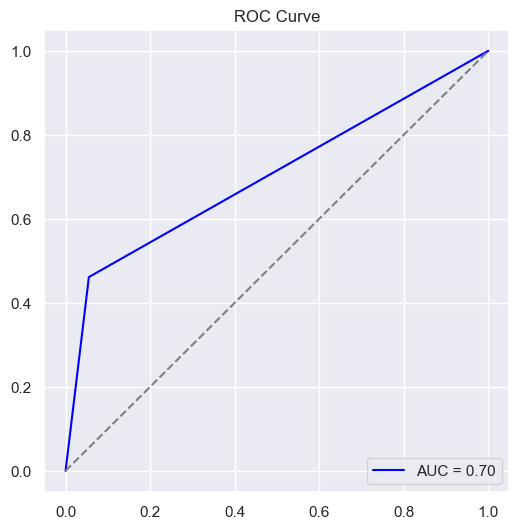

In [52]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.title("ROC Curve")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Pre-Processing on Adult Test Data

In [53]:
adult_test = pd.read_csv(r"C:\Users\Dell\Downloads\adult_test .csv",header=None)

adult_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [54]:
adult_test.columns = ["age","workclass","fnlwgt","education","education-num",
        "marital-status","occupation","relationship","race","sex",
        "capital-gain","capital-loss","hours-per-week","native-country","income"]

adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [55]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [57]:
adult_df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [58]:
adult_test_copy = adult_test.copy()
print(adult_test_copy.head())

   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   income  
0             0              40   Unite

In [59]:
adult_test_copy.duplicated().sum()

5

In [60]:
adult_test_copy.drop_duplicates(inplace=True, keep="first")
adult_test_copy.shape

(16276, 15)

In [61]:
adult_test_copy.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [62]:
adult_test_copy.drop(['fnlwgt', 'education'], axis=1, inplace=True)

adult_test_copy

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [63]:
for i in adult_test_copy:
    print(adult_test_copy[i].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']
[' Male' ' Female']
[    0  7688  3103  6418  7298  3908 14084 

In [64]:
adult_test_copy.replace(' ?', np.nan, inplace=True)

In [65]:
adult_test_copy.isnull().sum()

age                 0
workclass         963
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [66]:
# Mode of selected categorical columns
print("workclass:", adult_test_copy['workclass'].mode()[0])
print("occupation:", adult_test_copy['occupation'].mode()[0])
print("native-country:", adult_test_copy['native-country'].mode()[0])

workclass:  Private
occupation:  Prof-specialty
native-country:  United-States


In [67]:
adult_test_copy['workclass'].replace(np.nan, adult_test_copy['workclass'].mode()[0], inplace=True)
adult_test_copy['occupation'].replace(np.nan, adult_test_copy['occupation'].mode()[0], inplace=True)
adult_test_copy['native-country'].replace(np.nan, adult_test_copy['native-country'].mode()[0], inplace=True)

print(adult_test_copy[['workclass','occupation','native-country']])

           workclass          occupation  native-country
0            Private   Machine-op-inspct   United-States
1            Private     Farming-fishing   United-States
2          Local-gov     Protective-serv   United-States
3            Private   Machine-op-inspct   United-States
4            Private      Prof-specialty   United-States
...              ...                 ...             ...
16276        Private      Prof-specialty   United-States
16277        Private      Prof-specialty   United-States
16278        Private      Prof-specialty   United-States
16279        Private        Adm-clerical   United-States
16280   Self-emp-inc     Exec-managerial   United-States

[16276 rows x 3 columns]


In [68]:
adult_test_copy.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [69]:
adult_test_copy.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

# Data Encoding on Adult test 

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    adult_test_copy[x] = le.fit_transform(adult_test_copy[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------')

Feature workclass
mapping {' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}
-----------------
Feature marital-status
mapping {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
-----------------
Feature occupation
mapping {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
-----------------
Feature relationship
mapping {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
-----------------
Feature race
mapping {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, '

In [71]:
colname = []

for x in adult_test_copy.columns:
    if adult_test_copy[x].dtype == 'object':
        colname.append(x)

colname

[]

In [72]:
adult_test_copy.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


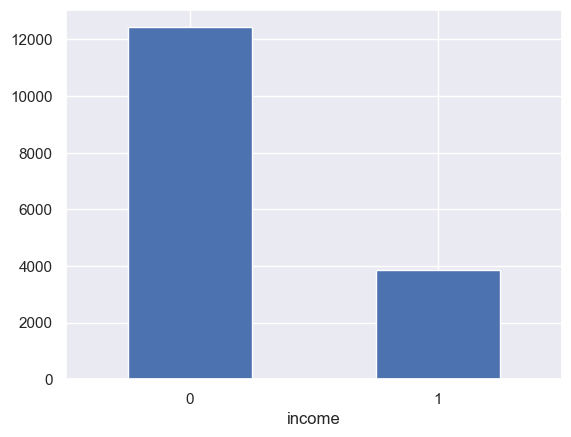

In [73]:
sns.set()

income_plot = adult_test_copy['income'].value_counts().plot(kind='bar')

plt.xlabel = ("Income")
plt.ylabel = ("Count")
plt.xticks(rotation = 360)


plt.show()

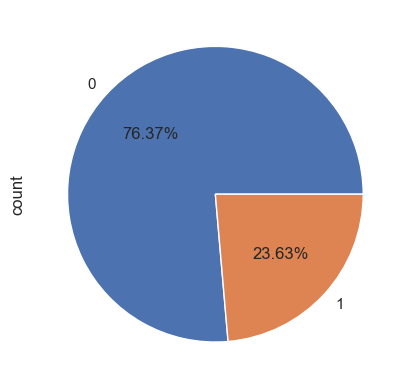

In [74]:
income_plot = adult_test_copy['income'].value_counts().plot(kind='pie', autopct = "%.2f%%")
plt.show()

In [90]:
X_test_new = adult_test_copy.values[:, 0:-1]

Y_test_new = adult_test_copy.values[:, -1]

print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_test_new)

X_test_new = scaler.transform(X_test_new)

In [92]:
print(X_test_new)

[[-0.99435564 -0.098473   -1.19666919 ... -0.21809714 -0.03161491
   0.25779865]
 [-0.05566369 -0.098473   -0.41769874 ... -0.21809714  0.76976224
   0.25779865]
 [-0.77773442 -1.88725268  0.75075694 ... -0.21809714 -0.03161491
   0.25779865]
 ...
 [-0.05566369 -0.098473    1.14024217 ... -0.21809714  0.76976224
   0.25779865]
 [ 0.37757876 -0.098473    1.14024217 ... -0.21809714 -0.03161491
   0.25779865]
 [-0.27228491  0.79591683  1.14024217 ... -0.21809714  1.5711394
   0.25779865]]


In [93]:
X_test_new = scaler.transform(X_test_new)

print(X_test_new)

[[-2.87133199 -2.86971577 -4.38915074 ... -0.21863812 -3.23965707
  -6.03758854]
 [-2.80355179 -2.86971577 -4.08575325 ... -0.21863812 -3.17543654
  -6.03758854]
 [-2.85569041 -4.46958213 -3.63065703 ... -0.21863812 -3.23965707
  -6.03758854]
 ...
 [-2.80355179 -2.86971577 -3.47895829 ... -0.21863812 -3.17543654
  -6.03758854]
 [-2.77226862 -2.86971577 -3.47895829 ... -0.21863812 -3.23965707
  -6.03758854]
 [-2.81919337 -2.06978259 -3.47895829 ... -0.21863812 -3.111216
  -6.03758854]]


In [94]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, Y_train)

Y_pred_new = classifier.predict(X_test_new)

print(Y_pred_new)

[0 0 0 ... 0 0 0]


In [111]:
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob

array([[0.71333914, 0.28666086],
       [0.92342099, 0.07657901],
       [0.45166947, 0.54833053],
       ...,
       [0.97701344, 0.02298656],
       [0.85360942, 0.14639058],
       [0.94346106, 0.05653894]])

In [112]:
print(list(zip(Y_test, Y_pred)))

[(1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0),

In [107]:
y_pred_new = []

for value in y_pred_prob[:, 1]:
    if value > 0.5:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0) 
print(y_pred_new)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, y_pred_new)
print(cfm)

print("Classification report")
print(classification_report(Y_test, y_pred_new))

acc = accuracy_score(Y_test, y_pred_new)
print("Accuracy of the model: ", acc)

[[6940  405]
 [1302 1115]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7345
           1       0.73      0.46      0.57      2417

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8251382913337431


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

classifier = LogisticRegression()

kfold_cv = KFold(n_splits=10, random_state=0, shuffle=True)

kfold_cv_result = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=kfold_cv)

print(kfold_cv_result)

print(kfold_cv_result.mean())

[0.82352941 0.82309043 0.81694469 0.83757682 0.81782265 0.82301274
 0.82257356 0.83003953 0.83135705 0.81730347]
0.82432503451895
